In [1]:
codedir = "/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/code"
imagedir = "/Users/admin/UDel/FASTLab/Summer2021_Research/imagedir"
datadir = ("/Users/admin/Udel/FASTLab/Summer2021_Research/"
           "SESNspectraPCA/Data/DataProducts")

In [2]:
import sys  
sys.path.insert(0, codedir)

In [3]:
import os

# import sklearn
# from sklearn.svm import LinearSVC
# from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
# import astropy.units as u
# import astropy.constants as c
# from scipy.integrate import trapezoid
# from astropy.convolution import convolve_fft, convolve, Gaussian1DKernel

import SNIDsn
import SNIDdataset as snid
# import SNePCA

# import degrade
# import kernels
# import plotutils
# import utils
# import classify_PCASVC as cps

import astrodash as ad

# from collections import OrderedDict

from importlib import reload

Instructions for updating:
non-resource variables are not supported in the long term


# Testing astrodash

1. Check that the astrodash SN lnw files can be read in with SNIDsn

They can.

2. Find an unambiguous SESN from the SESNspectraPCA dataset

3. Have DASH predict on it

4. Have DASH predict on it when it is degraded.

# 1 Check that SNIDsn can read in the astrodash lnw files

It can, but the format of SNIDsn.data is odd and will take some time to figure the most elegant way to extract the data.

In [4]:
# Check that SNIDsn can read in the astrodash lnw files
lnw = ("/Users/admin/UDel/FASTLab/astrodash/templates/training_set/"
       "sn1991bg.lnw")
snidObj = SNIDsn.SNIDsn()
snidObj.loadSNIDlnw(lnw)

In [5]:
snidObj.data.shape, snidObj.wavelengths.shape, snidObj.phases

((1024,),
 (1024,),
 array([  0.9,   1.9,   2.1,   2.1,  14.1,  15.8,  18. ,  18.3,  19.6,
         25. ,  28.9,  32.1,  33.1,  33.8,  45.7,  45.9,  49.9,  52.8,
         52.9,  53.9,  87.5, 112.6, 116.6, 116.7, 142.4, 202.1]))

In [6]:
len(snidObj.data.dtype), len(snidObj.data[0])

(26, 26)

In [7]:
snidObj.phases[0]

0.9

In [8]:
snidObj.phases

array([  0.9,   1.9,   2.1,   2.1,  14.1,  15.8,  18. ,  18.3,  19.6,
        25. ,  28.9,  32.1,  33.1,  33.8,  45.7,  45.9,  49.9,  52.8,
        52.9,  53.9,  87.5, 112.6, 116.6, 116.7, 142.4, 202.1])

In [9]:
np.where(snidObj.phases == 0.9)

(array([0]),)

In [10]:
snidObj.data[np.where(snidObj.phases == 116.7)]

array([(0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.)],
      dtype=[('Ph0.9', '<f4'), ('Ph1.9', '<f4'), ('Ph2.1', '<f4'), ('Ph2.1v1', '<f4'), ('Ph14.1', '<f4'), ('Ph15.8', '<f4'), ('Ph18.0', '<f4'), ('Ph18.3', '<f4'), ('Ph19.6', '<f4'), ('Ph25.0', '<f4'), ('Ph28.9', '<f4'), ('Ph32.1', '<f4'), ('Ph33.1', '<f4'), ('Ph33.8', '<f4'), ('Ph45.7', '<f4'), ('Ph45.9', '<f4'), ('Ph49.9', '<f4'), ('Ph52.8', '<f4'), ('Ph52.9', '<f4'), ('Ph53.9', '<f4'), ('Ph87.5', '<f4'), ('Ph112.6', '<f4'), ('Ph116.6', '<f4'), ('Ph116.7', '<f4'), ('Ph142.4', '<f4'), ('Ph202.1', '<f4')])

In [11]:
# for d in snidObj.data:
#     print(d)

snidObj.data

array([(0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.   , 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.),
       (0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.   , 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.),
       (0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.   , 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.),
       ...,
       (0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.001, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.),
       (0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.   , 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.),
       (0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.   , 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.)],
      dtype=[('Ph0.9', '<f4'), ('Ph1.9', '<f4'), ('Ph2.1', '<f4'), ('Ph2.1v1', '<f4'), ('Ph14.1', '<f4'), ('Ph15.8', '<f4'), ('Ph18.0', '<f4'), ('Ph18.3', '<f4'), ('Ph19.6', '<f4'), ('Ph25.0', '<f4'), ('Ph28.9', '<f4'), ('Ph32.1', '<f4'), ('Ph33.1', '<f4'), ('Ph33.8', '<f4'), ('Ph45.7', '<f

In [12]:
np.array(snidObj.data).shape

(1024,)

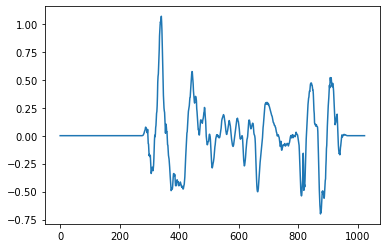

In [13]:
snidObj.data["Ph0.9"].shape
plt.plot(snidObj.data["Ph0.9"])

# 2 Find an unambiguous SESN from the SESNspectraPCA dataset

According to Williamson, Modjaz, & Bianco (2019) Figure 5, sn 11dh in Phase 0 seems to lie unambiguously in the IIb region of the SVM.

In [14]:
dataset0 = snid.loadPickle(os.path.join(datadir, "dataset0.pickle"))
dataset5 = snid.loadPickle(os.path.join(datadir, "dataset5.pickle"))
dataset10 = snid.loadPickle(os.path.join(datadir, "dataset10.pickle"))
dataset15 = snid.loadPickle(os.path.join(datadir, "dataset15.pickle"))

In [15]:
sn0 = dataset0['sn2011dh']

# 3 Run astrodash on the unambiguous SESN and see what it classfies it as

In [16]:
reload(ad)

<module 'astrodash' from '/Users/admin/UDel/FASTLab/astrodash/astrodash/__init__.py'>

In [17]:
csv_dir = ("/Users/admin/UDel/FASTLab/Summer2021_Research/SESNspectraPCA/"
           "wfortino/csv_data")

In [45]:
filename = os.path.join(csv_dir, "dataset0", "sn1998dt.csv")
df = pd.read_csv(filename)
df = df.drop(columns="err")
arr = df.values
arr.shape
# file = "test.csv"
# df = pd.read_csv("test.csv")
# arr = df.values

(414, 2)

In [46]:
cf = ad.Classify([arr.T], knownZ=False)

In [47]:
bestFits, redshifts, bestTypes, rejectionLabels, reliableFlags, redshiftErrs = cf.list_best_matches(n=5, saveFilename=None)
print(bestFits)
print(bestTypes)

INFO:tensorflow:Restoring parameters from /Users/admin/UDel/FASTLab/astrodash/astrodash/models_v06/models/agnosticZ/tensorflow_model.ckpt
0.11594124003523776
0.0
0.12513153140029587
0.004109287737583456
0.1309138584948859
0.0
0.11708590854102274
0.00823546172087708
0.1425678158004835
0.13672590238764193
0.11708590854102274
0.0
0.0
0.12513153140029587
0.0
0.0
0.0010257426329625119
0.13556110894586215
0.09441403132444637
0.01967007740639004
[[['' 'Ic-norm' '18 to 22' '0.36617']
  ['' 'Ib-norm' '6 to 10' '0.22619873']
  ['' 'Ib-norm' '2 to 6' '0.1121815']
  ['' 'Ib-norm' '-2 to 2' '0.08647527']
  ['' 'Ib-norm' '10 to 14' '0.07368418']]]
[('Ic-norm', '18 to 22', 0.3662)]
